In [1]:
import linkpred
from linkpred.evaluation import Pair
import networkx as nx
import random
import itertools
from operator import itemgetter
import pickle
import matplotlib.pyplot as plt

In [2]:
path = "../DataSet FFF/"

In [3]:
path_graph = "../DataSet FFF/Graph_data/"

In [4]:
saved_path = "../DataSet FFF/LinkPrediction_task/597/"

In [5]:
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [6]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 10361\nNumber of edges: 63960\nAverage degree:  12.3463'

# 1) Set preparation

In [7]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key = itemgetter(1), reverse = True)

In [8]:
sample_nodes = []
for i in sorted_degree:
    if i[1] > 50:
        sample_nodes.append(i[0])
print(len(sample_nodes))

257


In [9]:
new_graph = G.subgraph(sample_nodes)

print(len(new_graph.nodes()))
print(len(new_graph.edges()))

training_edge_len = len(new_graph.edges()) - int(len(new_graph.edges())/100 * 20)
test_edge_len = len(new_graph.edges()) - training_edge_len

257
5901


In [10]:
print(training_edge_len)
print(test_edge_len)

4721
1180


In [11]:
training_edges = random.sample(new_graph.edges, training_edge_len)

In [12]:
training_edges

[('twiff', 'peoplenotprofit'),
 ('climateemergency', 'co2'),
 ('notmyklimapaket', 'kohle'),
 ('berlin', 'covid_19'),
 ('fridaymotivation', 'science'),
 ('luisaneubauer', 'grüne'),
 ('sustainability', 'renewableenergy'),
 ('fridaysforfuture', 'digitalstrike'),
 ('btw21', 'fff'),
 ('climatecrisis', 'climatebrawl'),
 ('flattenthecurve', 'covid_19'),
 ('india', 'environment'),
 ('klimagerechtigkeit', 'verkehrswende'),
 ('ilmastolakko', 'mindthegap'),
 ('endcoal', 'facetheclimateemergency'),
 ('nomoreemptypromises', 'unitebehindthescience'),
 ('afd', 'noafd'),
 ('uprootthesystem', 'actnow'),
 ('klimaschutz', 'windkraft'),
 ('schoolstrike4climate', 'noplanetb'),
 ('climatestrikecanada', 'canada'),
 ('fridayforfuture', 'stopshell'),
 ('strike4climate', 'facetheclimateemergency'),
 ('klimakrise', 'grünen'),
 ('bundesregierung', 'co2'),
 ('nyc', 'climatestrike'),
 ('climateaction', 'pollutersout'),
 ('clima', 'cop25'),
 ('klimapaket', 'noafd'),
 ('pollution', 'climateemergency'),
 ('climatestri

2) Create training and test set

In [13]:
training = new_graph.edge_subgraph(training_edges)

In [14]:
print(nx.info(training))

Name: 
Type: Graph
Number of nodes: 257
Number of edges: 4721
Average degree:  36.7393


In [15]:
test = new_graph.copy()
test.remove_edges_from(training.edges())

In [16]:
print(nx.info(test))

Name: 
Type: Graph
Number of nodes: 257
Number of edges: 1180
Average degree:   9.1829


4) Create node set

In [17]:
nodes = list(new_graph.nodes())
nodes.extend(list(test.nodes()))

5) Compute pair test set and universe set

In [18]:
test = [Pair(i) for i in test.edges()]
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0]!=i[1]])

In [19]:
print(len(universe))

32896


6) Storage file

In [20]:
universe

{Pair('milano', 'climatejustice'),
 Pair('rassismus', 'antifa'),
 Pair('tempolimit', 'tantacazz'),
 Pair('stayathome', 'schoolstrikeforclimate'),
 Pair('water', 'niemehrcdu'),
 Pair('uk', 'nature'),
 Pair('trump', 'fcknzs'),
 Pair('savetheplanet', 'neustartklima'),
 Pair('usa', 'nrw'),
 Pair('nrw', 'berlin'),
 Pair('grüne', 'cambioclimático'),
 Pair('cdnpoli', 'actnow'),
 Pair('systemchange', 'btw21'),
 Pair('fighteverycrisis', 'ampel'),
 Pair('justtransition', 'extinctionrebellion'),
 Pair('ecocide', 'csu'),
 Pair('気候危機', 'globalcrisis'),
 Pair('cdnpoli', 'actonclimate'),
 Pair('climateemergency', 'climatecrisis'),
 Pair('roma', 'globalcrisis'),
 Pair('klimabewegung', 'atomkraft'),
 Pair('youthstrike4climate', 'demo'),
 Pair('systemchange', 'alledörferbleiben'),
 Pair('datteln4', 'atomkraft'),
 Pair('klimanotstand', 'berlin'),
 Pair('italiaviva', 'btw21'),
 Pair('earth', 'davos'),
 Pair('ghg', 'coal'),
 Pair('klimastreik', 'fridayfun'),
 Pair('india', 'berlin'),
 Pair('nature', 'kohle

In [21]:
with open(saved_path+'universe_597.pickle', 'wb') as f:
    pickle.dump(universe, f)
with open(saved_path+'test_597.pickle', 'wb') as f:
    pickle.dump(test, f) 
nx.write_graphml(training, saved_path+"training_597.graphml")

# 2) Prediction

1) Read data

In [22]:
with open(saved_path+'universe_597.pickle', 'rb') as f:
    universe = pickle.load(f)
with open(saved_path+'test_597.pickle', 'rb') as f:
    test = pickle.load(f)
training = nx.read_graphml(saved_path+"training_597.graphml")

2) Predictions

In [23]:
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())
cn_results = cn.predict()

In [24]:
aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())
aa_results = aa.predict()

In [25]:
jc = linkpred.predictors.Jaccard(training, excluded=training.edges())
jc_results = jc.predict()

In [26]:
kz = linkpred.predictors.Katz(training, excluded=training.edges())
kz_results = kz.predict()

Computing matrix powers: [############################################################] 5/5


In [27]:
simrank = linkpred.predictors.SimRank(training, excluded=training.edges())
simrank_results = simrank.predict()

3) Saved predictions

In [28]:
with open(saved_path+'aa_results.pickle', 'wb') as f:
    pickle.dump(aa_results, f)
with open(saved_path+'cn_results.pickle', 'wb') as f:
    pickle.dump(cn_results, f) 
with open(saved_path+'jc_results.pickle', 'wb') as f:
    pickle.dump(jc_results, f) 
with open(saved_path+'kz_results.pickle', 'wb') as f:
    pickle.dump(kz_results, f) 
with open(saved_path+'simrank_results.pickle', 'wb') as f:
    pickle.dump(simrank_results, f) 

3) Evaluation

In [29]:
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)

In [30]:
with open(saved_path+'cn_evaluation.pickle', 'wb') as f:
    pickle.dump(cn_evaluation, f) 

In [31]:
aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)

In [32]:
with open(saved_path+'aa_evaluation.pickle', 'wb') as f:
    pickle.dump(aa_evaluation, f) 

In [33]:
jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)

In [34]:
with open(saved_path+'jc_evaluation.pickle', 'wb') as f:
    pickle.dump(jc_evaluation, f) 

In [35]:
kz_evaluation = linkpred.evaluation.EvaluationSheet(kz_results, test, universe)

In [36]:
with open(saved_path+'kz_evaluation.pickle', 'wb') as f:
    pickle.dump(kz_evaluation, f) 

In [37]:
simrank_evaluation = linkpred.evaluation.EvaluationSheet(simrank_results, test, universe)

In [38]:
with open(saved_path+'simrank_evaluation.pickle', 'wb') as f:
    pickle.dump(simrank_evaluation, f) 

In [39]:
res = []
for i, j in zip(cn_results, cn_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'cn_results.pickle', 'wb') as f:
    pickle.dump(res, f)

In [40]:
res = []
for i, j in zip(aa_results, aa_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'aa_results.pickle', 'wb') as f:
    pickle.dump(res, f)

In [41]:
res = []
for i, j in zip(jc_results, jc_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'jc_results.pickle', 'wb') as f:
    pickle.dump(res, f)

In [42]:
res = []
for i, j in zip(kz_results, kz_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'kz_results.pickle', 'wb') as f:
    pickle.dump(res, f)

In [43]:
res = []
for i, j in zip(simrank_results, simrank_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'simrank_results.pickle', 'wb') as f:
    pickle.dump(res, f)

# 3) Result Analysis

In [44]:
with open(saved_path+'aa_evaluation.pickle', 'rb') as f:
    aa_evaluation = pickle.load(f)
with open(saved_path+'aa_results.pickle', 'rb') as f:
    aa_results = pickle.load(f)
    
with open(saved_path+'cn_evaluation.pickle', 'rb') as f:
    cn_evaluation = pickle.load(f)
with open(saved_path+'cn_results.pickle', 'rb') as f:
    cn_results = pickle.load(f)

with open(saved_path+'jc_evaluation.pickle', 'rb') as f:
    jc_evaluation = pickle.load(f)
with open(saved_path+'jc_results.pickle', 'rb') as f:
    jc_results = pickle.load(f)

with open(saved_path+'kz_evaluation.pickle', 'rb') as f:
    kz_evaluation = pickle.load(f)
with open(saved_path+'kz_results.pickle', 'rb') as f:
    kz_results = pickle.load(f)

with open(saved_path+'simrank_evaluation.pickle', 'rb') as f:
    sm_evaluation = pickle.load(f)
with open(saved_path+'simrank_results.pickle', 'rb') as f:
    sm_results = pickle.load(f)

In [45]:
def print_res(res):
    res=sorted(res,key=lambda x: x[1],reverse=True)
    for i in res[:10]:
        print(i)

In [46]:
print_res(aa_results)
print("")
print("")
print("")
print_res(cn_results)
print("")
print("")
print("")
print_res(jc_results)
print("")
print("")
print("")
print_res(kz_results)
print("")
print("")
print("")
print_res(sm_results)

[Pair('fridaysforfuture', 'fridayforfuture'), 30.801760450314635]
[Pair('climatestrike', 'climatecrisis'), 30.516736006513753]
[Pair('gretathunberg', 'fridaysforfuture'), 27.446606177981273]
[Pair('klimakrise', 'fridaysforfuture'), 24.495649672504175]
[Pair('fridayforfuture', 'climateaction'), 23.826918319931544]
[Pair('gretathunberg', 'climatestrike'), 22.963180968599385]
[Pair('fridaysforfuture', 'climatejustice'), 22.371818635584024]
[Pair('fridayforfuture', 'climatecrisis'), 21.309805679346052]
[Pair('climatestrike', 'climatejustice'), 20.670762993546216]
[Pair('schoolstrike4climate', 'climatestrike'), 20.561617041996545]



[Pair('climatestrike', 'climatecrisis'), 106.0]
[Pair('fridaysforfuture', 'fridayforfuture'), 106.0]
[Pair('gretathunberg', 'fridaysforfuture'), 95.0]
[Pair('klimakrise', 'fridaysforfuture'), 86.0]
[Pair('fridayforfuture', 'climateaction'), 85.0]
[Pair('fridaysforfuture', 'climatejustice'), 81.0]
[Pair('gretathunberg', 'climatestrike'), 81.0]
[Pair('climatestri

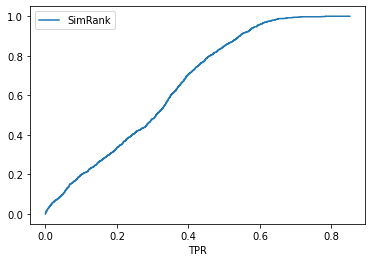

In [47]:
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")

plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

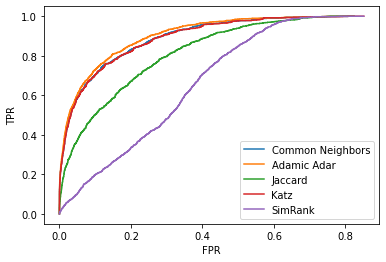

In [48]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")


plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

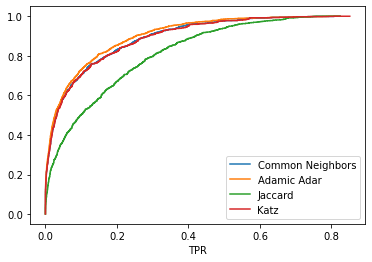

In [49]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

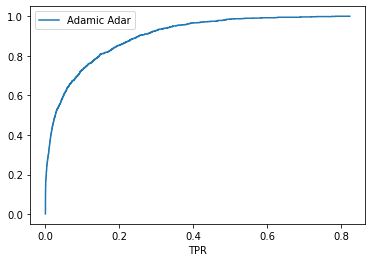

In [50]:
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

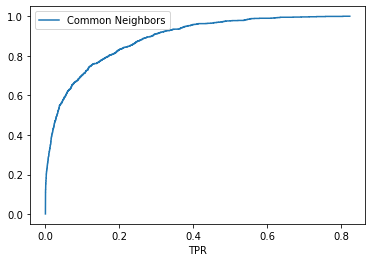

In [51]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

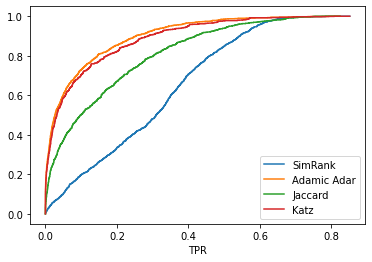

In [52]:
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

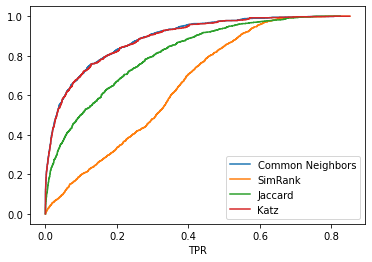

In [53]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import auc

print("Area Under Roc Curve (AUROC)")
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")
print(f"Adamic Adar: \t {auc(aa_evaluation.fallout(), aa_evaluation.recall())}")
print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")
print(f"SimRank: \t {auc(sm_evaluation.fallout(), sm_evaluation.recall())}")
print(f"Katz:\t \t {auc(kz_evaluation.fallout(), kz_evaluation.recall())}")

Area Under Roc Curve (AUROC)
Common Neigh.: 	 0.7303434239468504
Adamic Adar: 	 0.7400116179397236
Jaccard: 	 0.6617863570972038
SimRank: 	 0.5546558599519893
Katz:	 	 0.7561313489849534


In [55]:
preds = list(nx.preferential_attachment(training,universe))
pref_results=[]
for u, v, p in preds:
    #print('(%s, %s) -> %d' % (u, v, p))
    pref_results.append([u,v,p])
pref_results=sorted(pref_results,key=lambda x: x[2],reverse=True)
pref_results

[['fridaysforfuture', 'climatestrike', 33166],
 ['fridaysforfuture', 'climateaction', 30900],
 ['fridaysforfuture', 'climatechange', 29252],
 ['fridaysforfuture', 'climatecrisis', 29046],
 ['fridaysforfuture', 'climateemergency', 27398],
 ['fridaysforfuture', 'fridayforfuture', 26368],
 ['gretathunberg', 'fridaysforfuture', 24514],
 ['climatestrike', 'climateaction', 24150],
 ['climatestrike', 'climatechange', 22862],
 ['climatestrike', 'climatecrisis', 22701],
 ['fridaysforfuture', 'extinctionrebellion', 21836],
 ['fridaysforfuture', 'climate', 21836],
 ['fridaysforfuture', 'fff', 21424],
 ['climatestrike', 'climateemergency', 21413],
 ['climatechange', 'climateaction', 21300],
 ['climatecrisis', 'climateaction', 21150],
 ['klimaschutz', 'fridaysforfuture', 21012],
 ['klimastreik', 'fridaysforfuture', 20806],
 ['klimakrise', 'fridaysforfuture', 20806],
 ['fridayforfuture', 'climatestrike', 20608],
 ['fridaysforfuture', 'climatejustice', 20600],
 ['fridaysforfuture', 'climateactionnow'

In [56]:
def intersect(result_1, result_2, dim, name):
    print(f"{name}")
    int_1_2=[]
    count=0
    for item_1 in result_1[:300]:
        for item_2 in result_2[:300]:
            if item_1[0]==item_2[0]:
                print('intersezione:',item_1[0])
                int_1_2.append(item_1[0])
                count+=1
    print(count)
    return int_1_2

In [57]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [58]:
aa_cn = intersect(aa_results, cn_results, 300, "AA vs CN")
aa_jc = intersect(aa_results, jc_results, 300, "AA vs JC")
aa_kz = intersect(aa_results, kz_results, 300, "AA vs KZ")
aa_sm = intersect(aa_results, sm_results, 300, "AA vs SM")


AA vs CN
intersezione: energy - ampel
intersezione: fcknzs - ampel
intersezione: klimakrise - ampel
intersezione: klimanotstand - ampel
intersezione: plantbased - ampel
intersezione: energiewende - ampel
intersezione: twiff - ampel
intersezione: endegelände - ampel
intersezione: luisaneubauer - ampel
intersezione: suv - ampel
intersezione: strike4climate - ampel
intersezione: ampel - airpollution
intersezione: parentsforfuture - ampel
intersezione: youthforclimate - ampel
intersezione: btw21 - ampel
intersezione: nonazis - ampel
intersezione: hamburg - ampel
intersezione: ampel - alledoerferbleiben
intersezione: umweltsau - ampel
intersezione: datteln4 - ampel
intersezione: bundestag - ampel
intersezione: israel - ampel
intersezione: neustartklima - ampel
intersezione: notmyklimapaket - ampel
intersezione: fff - ampel
intersezione: climatejustice - ampel
intersezione: davos - ampel
intersezione: klimapolitik - ampel
intersezione: greenpeace - ampel
intersezione: trump - ampel
intersezi

intersezione: green - energiewende
intersezione: green - globalclimatejustice
intersezione: green - endegelände
intersezione: luisaneubauer - green
intersezione: suv - green
intersezione: laschet - green
intersezione: green - ev
intersezione: strike4climate - green
intersezione: roma - green
intersezione: green - climatestrikecanada
intersezione: youthforclimate - green
intersezione: parentsforfuture - green
intersezione: green - boomersforclimatejustice
intersezione: green - btw21
intersezione: nonazis - green
intersezione: hamburg - green
intersezione: green - ghg
intersezione: green - alledoerferbleiben
intersezione: spd - green
intersezione: habeck - green
intersezione: sudbury - green
intersezione: green - datteln4
intersezione: umweltsau - green
intersezione: green - food
intersezione: stopadani - green
intersezione: green - coal
intersezione: green - bundestag
intersezione: tiredearth - green
intersezione: israel - green
intersezione: neustartklima - green
intersezione: notmykli

In [59]:
cn_jc = intersect(cn_results, jc_results, 300, "CN vs JC")
cn_kz = intersect(cn_results, kz_results, 300, "CN vs KZ")
cn_sm = intersect(cn_results, sm_results, 300, "CN vs SM")

CN vs JC
intersezione: energy - ampel
intersezione: fcknzs - ampel
intersezione: klimakrise - ampel
intersezione: klimanotstand - ampel
intersezione: plantbased - ampel
intersezione: energiewende - ampel
intersezione: twiff - ampel
intersezione: endegelände - ampel
intersezione: luisaneubauer - ampel
intersezione: suv - ampel
intersezione: strike4climate - ampel
intersezione: ampel - airpollution
intersezione: parentsforfuture - ampel
intersezione: youthforclimate - ampel
intersezione: btw21 - ampel
intersezione: nonazis - ampel
intersezione: hamburg - ampel
intersezione: ampel - alledoerferbleiben
intersezione: umweltsau - ampel
intersezione: datteln4 - ampel
intersezione: bundestag - ampel
intersezione: israel - ampel
intersezione: neustartklima - ampel
intersezione: notmyklimapaket - ampel
intersezione: fff - ampel
intersezione: climatejustice - ampel
intersezione: davos - ampel
intersezione: klimapolitik - ampel
intersezione: greenpeace - ampel
intersezione: trump - ampel
intersezi

In [60]:
jc_kz = intersect(jc_results, kz_results, 300, "JC vs KZ")
jc_sm = intersect(jc_results, sm_results, 300, "JC vs SM")

JC vs KZ
intersezione: energy - ampel
intersezione: fcknzs - ampel
intersezione: klimakrise - ampel
intersezione: klimanotstand - ampel
intersezione: plantbased - ampel
intersezione: energiewende - ampel
intersezione: twiff - ampel
intersezione: endegelände - ampel
intersezione: luisaneubauer - ampel
intersezione: suv - ampel
intersezione: strike4climate - ampel
intersezione: ampel - airpollution
intersezione: parentsforfuture - ampel
intersezione: youthforclimate - ampel
intersezione: btw21 - ampel
intersezione: nonazis - ampel
intersezione: hamburg - ampel
intersezione: ampel - alledoerferbleiben
intersezione: umweltsau - ampel
intersezione: datteln4 - ampel
intersezione: bundestag - ampel
intersezione: israel - ampel
intersezione: neustartklima - ampel
intersezione: notmyklimapaket - ampel
intersezione: fff - ampel
intersezione: climatejustice - ampel
intersezione: davos - ampel
intersezione: klimapolitik - ampel
intersezione: greenpeace - ampel
intersezione: trump - ampel
intersezi

In [61]:
kz_sm = intersect(kz_results, sm_results, 300, "KZ vs SM")

KZ vs SM
intersezione: systemchange - ampel
intersezione: cambioclimático - ampel
intersezione: fighteverycrisis - ampel
intersezione: blackfriday - ampel
intersezione: earthstrike - ampel
intersezione: science - ampel
intersezione: by2020weriseup - ampel
intersezione: tech - ampel
intersezione: fridayfeeling - ampel
intersezione: stayathome - ampel
intersezione: climatestrikes - ampel
intersezione: unitebehindthescience - ampel
intersezione: renewables - ampel
intersezione: ampel - actonclimate
intersezione: greenpeace - ampel
intersezione: ampel - alledoerferbleiben
intersezione: endegelände - ampel
intersezione: schoolstrikeforclimate - ampel
intersezione: carbon - ampel
intersezione: stopeacop - ampel
intersezione: renewableenergy - ampel
intersezione: digitalstrike - ampel
intersezione: fossilfuels - ampel
intersezione: climatejusticenow - ampel
intersezione: savetheplanet - ampel
intersezione: globalcrisis - ampel
intersezione: schoolstrike - ampel
intersezione: planet - ampel
in

In [62]:
# All intersection
int_m=intersection(cn_jc,kz_sm)
int_final=intersection(int_m,aa_sm)

In [63]:
len(int_final)

190

In [64]:
int_final

[Pair('energy', 'ampel'),
 Pair('fcknzs', 'ampel'),
 Pair('klimakrise', 'ampel'),
 Pair('klimanotstand', 'ampel'),
 Pair('plantbased', 'ampel'),
 Pair('energiewende', 'ampel'),
 Pair('twiff', 'ampel'),
 Pair('endegelände', 'ampel'),
 Pair('luisaneubauer', 'ampel'),
 Pair('suv', 'ampel'),
 Pair('strike4climate', 'ampel'),
 Pair('ampel', 'airpollution'),
 Pair('parentsforfuture', 'ampel'),
 Pair('youthforclimate', 'ampel'),
 Pair('btw21', 'ampel'),
 Pair('nonazis', 'ampel'),
 Pair('hamburg', 'ampel'),
 Pair('ampel', 'alledoerferbleiben'),
 Pair('umweltsau', 'ampel'),
 Pair('datteln4', 'ampel'),
 Pair('bundestag', 'ampel'),
 Pair('israel', 'ampel'),
 Pair('neustartklima', 'ampel'),
 Pair('notmyklimapaket', 'ampel'),
 Pair('fff', 'ampel'),
 Pair('climatejustice', 'ampel'),
 Pair('davos', 'ampel'),
 Pair('klimapolitik', 'ampel'),
 Pair('greenpeace', 'ampel'),
 Pair('trump', 'ampel'),
 Pair('climatestrike', 'ampel'),
 Pair('grünen', 'ampel'),
 Pair('globalclimatestrike', 'ampel'),
 Pair('pla